#Containers vs. Iterables vs. Iterators vs. Generators


*   https://nvie.com/posts/iterators-vs-generators/
*   https://realpython.com/python-iterators-iterables/



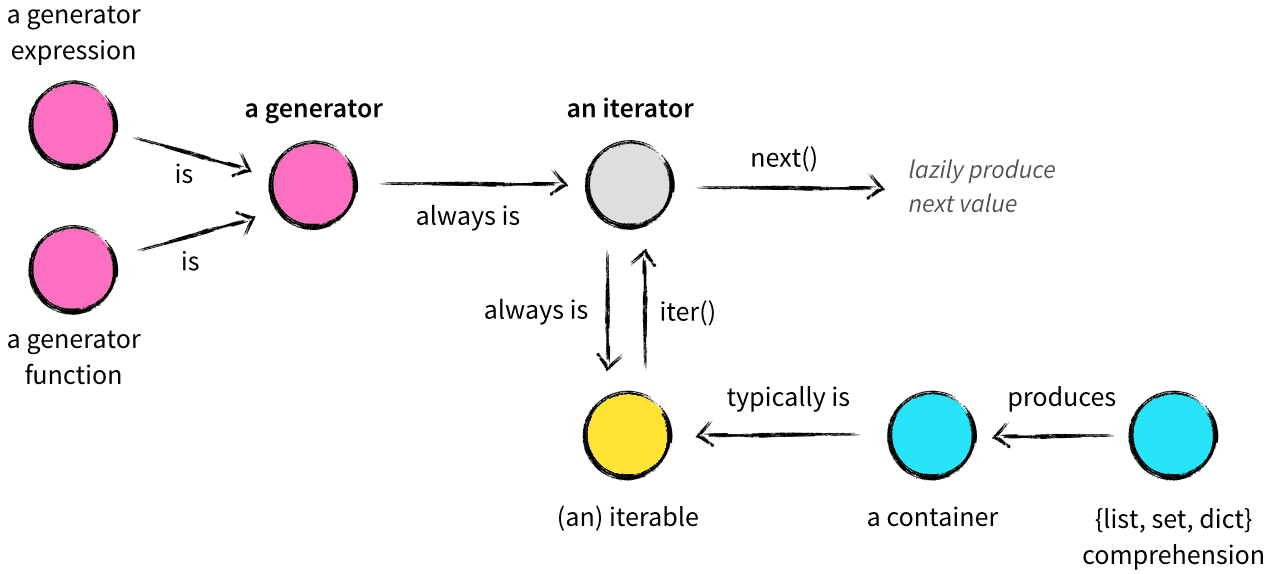

# Containers

* **Containers** are data structures *holding elements*, and that *support
membership tests*. They are data structures that live in memory, and typically hold all their values in memory, too. In Python, some well known examples are:
list, set, dict, tuple, str, ...
* Checking memebership using **in** and **not in** operators
* Most containers are also **iterable**.

In [ ]:
# check whether a list container contains a certain element
print(1 in [1, 2, 3])
print()

# check whether a dict container contains a certain key(element)
d = {1: 'foo', 2: 'bar', 3: 'qux'}
print(1 in d)
print()

# check whether a str container contains a certain element
s = 'foobar'
print('b' in s)
print()

True

True

True



In [ ]:
# Define a custom container with __contains__() function

class CourseContainer(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  # In Python, the “__contains__” method is a built-in method that allows us to check whether a specific element exists in a collection or not.
  # It is used with the “in” keyword to test if an object is contained within another object.
  def __contains__(self, item):
    return item in self.courses


a = CourseContainer()

print('CS4210' in a)
print()

print('CS4990' in a)

True

True


# Iterables and Iterators
https://docs.python.org/3/glossary.html#term-iterable

https://realpython.com/python-iterators-iterables/
* \_\_iter\_\_(): Called to initialize the iterator. It must return an iterator object.
* \_\_next\_\_():	Called to iterate over the iterator. It must return the next value in the data stream.

**Note**: You shouldn’t use \_\_iter\_\_() and \_\_next\_\_() directly in your code. Instead, you should use the built-in iter() and next() functions, which fall back to calling the corresponding special methods.

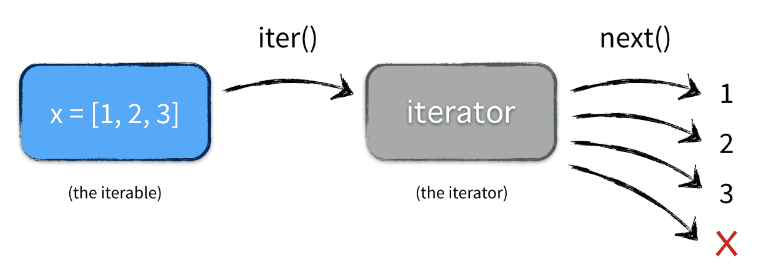

Note that **An iterable is an object implementing the .\_\_iter\_\_() special method or the \_\_getitem\_\_() method as part of the sequence protocol.**


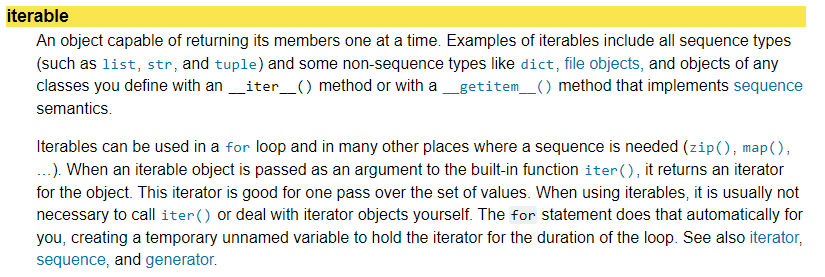


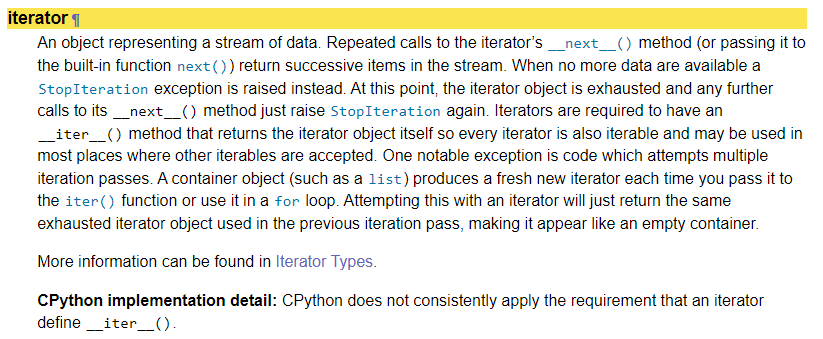

In [ ]:
#  collections.abc provides abstract base classes that can be used to test whether a class provides a particular interface;
from collections.abc import Iterable, Iterator

class Course_Iterable(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    return self.courses

a = Course_Iterable()

print(isinstance(a, Iterable))
print(isinstance(a, Iterator))

True
False


In [ ]:
#  collections.abc provides abstract base classes that can be used to test whether a class provides a particular interface;
from collections.abc import Iterable, Iterator

class Course_Iterator(object):
  def __init__(self):
    self.idx = -1
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    return self

  def __next__(self):
    self.idx += 1
    if self.idx < len(self.courses):
      return self.courses[self.idx]
    else:
      raise StopIteration()

a = Course_Iterator()

print(isinstance(a, Iterable))
print(isinstance(a, Iterator))

print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))

True
True
CS2400
CS3010
CS4210
CS4990
CS5190


In [ ]:
# lists are iterable objects, not iterators
courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

print(isinstance(courses, Iterable))
print(isinstance(courses, Iterator))

True
False


## The facts of *for* loop

* https://realpython.com/python-for-loop/#the-guts-of-the-python-for-loop
* https://docs.python.org/3/reference/compound_stmts.html#the-for-statement
* https://www.toppr.com/guides/python-guide/tutorials/python-advanced-topics/python-iterators/


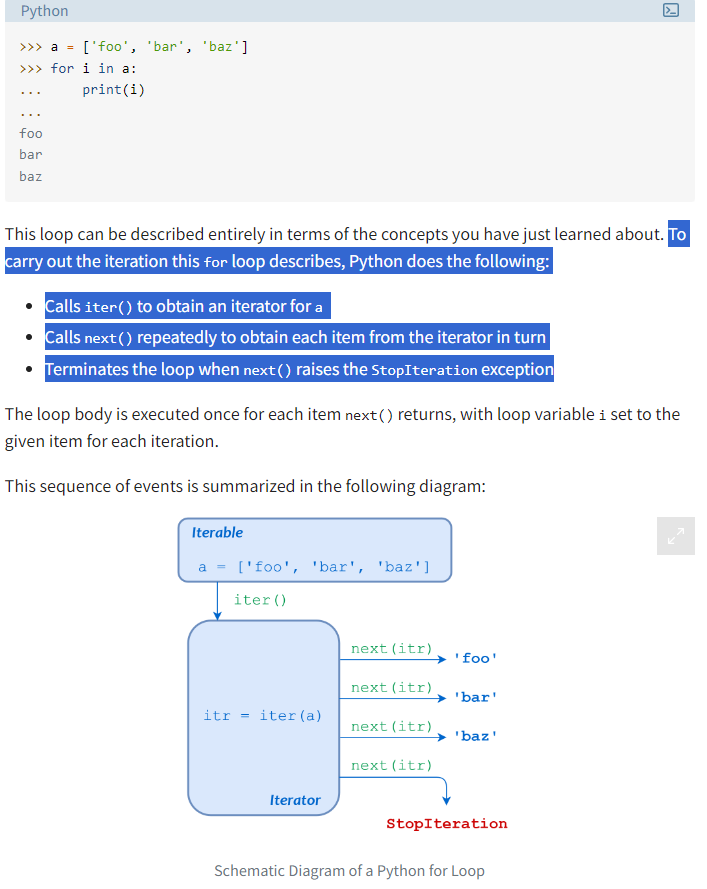


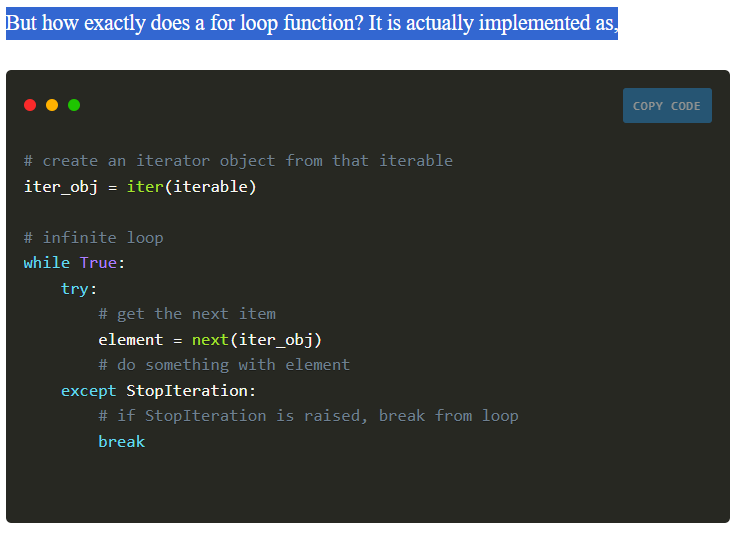


Note that: **Python's iter()**

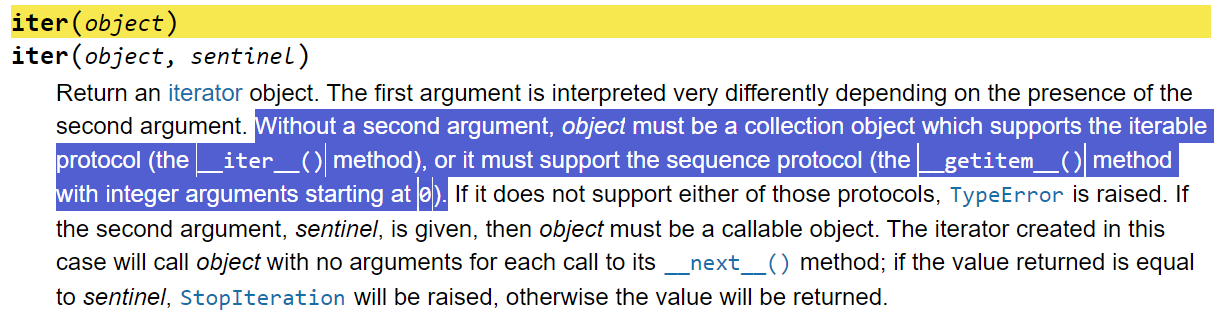


### \_\_iter\_\_() is called in *for* loop

In [ ]:
#  collections.abc provides abstract base classes that can be used to test whether a class provides a particular interface;
from collections.abc import Iterable, Iterator

class Course_Iterable(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    print('__iter__() is called!')
    return self.courses

b = Course_Iterable()

print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print()

for item in b:   # although iter(b) is called, but it returns a list which is not an iterator and it doesn't have __next__ method
  print(item)

True
False
__iter__() is called!


TypeError: ignored

In [ ]:
from collections.abc import Iterable, Iterator

class Course_Iterator(object):
  def __init__(self):
    self.idx = -1
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    print('__iter__() is called!')
    return self     # (1) the object itself is an iterator becuase of __next__()

  def __next__(self):   # (2) the object has __next__() which returns next item
    print('__next__() is called!')
    self.idx += 1
    if self.idx < len(self.courses):
      return self.courses[self.idx]
    else:
      print('reach StopIteration()!')
      raise StopIteration()

c = Course_Iterator()

print(isinstance(c, Iterable))
print(isinstance(c, Iterator))
print()

for item in c:  # c is an iterator
  print(item)
  print()

True
True

__iter__() is called!
__next__() is called!
CS2400

__next__() is called!
CS3010

__next__() is called!
CS4210

__next__() is called!
CS4990

__next__() is called!
CS5190

__next__() is called!
reach StopIteration()!


### \_\_iter\_\_() must return an iterator object.

In [ ]:
from collections.abc import Iterable, Iterator
a = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

print(isinstance(a, Iterable))
print(isinstance(a, Iterator))
print()

for item in a:   # iter(a) is called, and it returns an iterator of the list which has __next__ method
  print(item)
print()

# Python's dir() function returns list of the attributes and methods of any object
print(dir(a))  # you may notice that iter(a) is an iterable that has __iter__(), but not __next__()
print()

print(dir(iter(a)))  # you may notice that iter(a) is an iterator that has both __iter__() and __next__()

True
False

CS2400
CS3010
CS4210
CS4990
CS5190

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']


In [ ]:
from collections.abc import Iterable, Iterator

class Course_Iterable(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    print('__iter__() is called!')
    return iter(self.courses)     # ********* fix the issue, by calling list's iter() to return an iterator of the list

b = Course_Iterable()

print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print()

c = iter(b)
print(isinstance(c, Iterable))
print(isinstance(c, Iterator))
print()

print(next(c))
print(next(c))
print(next(c))
print(next(c))
print(next(c))

True
False

__iter__() is called!
True
True

CS2400
CS3010
CS4210
CS4990
CS5190


### A weird, but interesting, implementation of an object that can work with "for" loop

It is working, as long as \_\_next\_\_() can be called after \_\_iter\_\_().

In [ ]:
from collections.abc import Iterable, Iterator


class A_Iterable_NonIterator(object):
  def __init__(self):
    self.obj = B_NonIterable_NonIterator()

  def __iter__(self):
    print('__iter__() is called!')
    return self.obj

class B_NonIterable_NonIterator(object):
  def __init__(self):
    self.idx = -1
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __next__(self):   # (2) the object has __next__() which returns next item
    print('__next__() is called!')
    self.idx += 1
    if self.idx < len(self.courses):
      return self.courses[self.idx]
    else:
      print('reach StopIteration()!')
      raise StopIteration()

a = A_Iterable_NonIterator()
print(isinstance(a, Iterable))
print(isinstance(a, Iterator))
print()

b = B_NonIterable_NonIterator()
print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print()

for item in a:
  print(item)
  print()

True
False

False
False

__iter__() is called!
__next__() is called!
CS2400

__next__() is called!
CS3010

__next__() is called!
CS4210

__next__() is called!
CS4990

__next__() is called!
CS5190

__next__() is called!
reach StopIteration()!


## Build your object as a subclass of collections.Iterable or collections.Iterator

* If you want your object is Iterable, building it as a subclass of collections.Iterable. Then Python interpreter will force you to define \_\_iter\_\_().
* If you want your object is Iterator, building it as a subclass of collections.Iterator. Then Python interpreter will force you to define \_\_next\_\_().

In [ ]:
from collections.abc import Iterable, Iterator

class Course_Iterable(Iterable):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

b = Course_Iterable()

print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print()

for item in b:
  print(item)

TypeError: ignored

In [ ]:
from collections.abc import Iterable, Iterator

class Course_Iterator(Iterator):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

b = Course_Iterator()

print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print()

for item in b:
  print(item)

TypeError: ignored

## A magic and legacy method: \_\_getitem\_\_()
https://realpython.com/python-iterators-iterables/#the-sequence-protocol

* This is the sequence protocol, defined in terms of \_\_getitem\_\_() and \_\_len\_\_(), to enable iteration over the items , even though it does not define an \_\_iter\_\_() method

* However, \_\_getitem\_\_() itself can't make the object as an Iterable or Iterator type.

* In case the \_\_iter\_\_() method is absent but the \_\_getitem\_\_() method exists, a call to **iter()** will produce an iterator that use the \_\_getitem\_\_() method to iterate the items using index-based access, starting from index 0.



In [ ]:
from collections.abc import Iterable, Iterator

class Courses(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __getitem__(self, idx):
    return self.courses[idx]

b = Courses()

print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print()

for item in b:
  print(item)
print()

print(dir(b))
print()

print(dir(iter(b)))
print()

c = iter(b)
print(isinstance(c, Iterable))
print(isinstance(c, Iterator))
print()

False
False

CS2400
CS3010
CS4210
CS4990
CS5190

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'courses']

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']

True
True



### \_\_getitem\_\_() enables index-based access, starting from index 0.

In [ ]:
print(b[0])
print()

print(b[1])
print()

CS2400

CS3010



## \_\_len\_\_() method returns the length of an object

https://pyneng.readthedocs.io/en/latest/book/23_oop_special_methods/sequence_protocol.html

https://realpython.com/python-iterators-iterables/

In the most basic version, **sequence protocol** (sequence) includes **two methods: \_\_len\_\_() and \_\_getitem\_\_()**

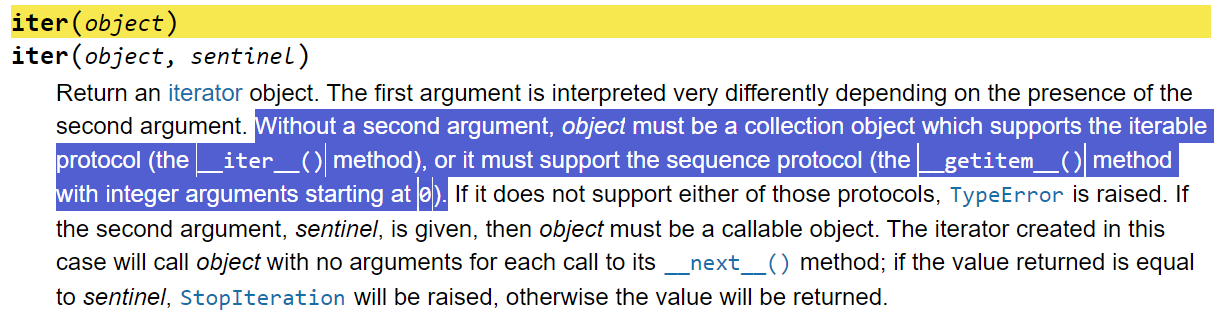


In [ ]:
class Courses(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __getitem__(self, idx):
    return self.courses[idx]

  def __len__(self):
    return len(self.courses)

b = Courses()

print(len(b))

5


# Generators

https://nvie.com/posts/iterators-vs-generators/

A generator is a special kind of iterator—the elegant kind.
> - A generator allows you to write iterators much like the Fibonacci sequence iterator example above, but in an elegant succinct syntax that avoids writing classes with __iter__() and __next__() methods.
>- Let's be explicit:
>>- Any generator also is an iterator (not vice versa!);
>>- Any generator, therefore, is a factory that lazily produces values.

https://realpython.com/python-iterators-iterables/#creating-generator-iterators



There are two types of **generators** in Python: generator functions and generator expressions.
* A **generator function** is any function in which the keyword yield appears in its body.
* A **generator expression** is a concise way to create a generator object. It is almost the same as that of a list comprehension.
>- generator expression uses (), for example, (i for i in range(4))
>- list comprehension uses [], for example, [i for i in range(4)]



## Using a generator function to create a generator object

In [ ]:
from collections.abc import Iterable, Iterator, Generator

def courses_func():
  for item in ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']:
    yield item

a = courses_func()

print(isinstance(a, Iterable))
print(isinstance(a, Iterator))
print(isinstance(a, Generator))
print()

for elem in a:
  print(elem)

True
True
True

CS2400
CS3010
CS4210
CS4990
CS5190


In [ ]:
# a generator for building Fibonacci sequence
def fib_func():
  prev, curr = 0, 1
  while True:
    yield curr
    prev, curr = curr, prev+curr

f = fib_func()

from itertools import islice
for elem in islice(f, 10):  # islice get an iterator of the first N elements
  print(elem)

1
1
2
3
5
8
13
21
34
55


## Using generator expression to create a generator object

In [ ]:
from collections.abc import Iterable, Iterator, Generator
a = [item for item in ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']]  # List comprehension
print(a)
print()

b = (item for item in ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']) # Generator expression
print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print(isinstance(b, Generator))
print()

for elem in b:
  print(elem)

['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

True
True
True

CS2400
CS3010
CS4210
CS4990
CS5190


# More Notes:


## Iterators vs Generators

* **Iterators** typically yield data from an existing iterable, such as a sequence or collection data structure. **Generators** not only can yield data from **an existing iterable**, but also can generate **streams of data**.

* **Iterators** and **generators** are pretty **memory-efficient** when you compare them with regular functions, container data types, and comprehensions. With iterators and generators, you don’t need to store all the data in your compter’s memory at the same time.
>-  **A Lazy Factory**: from the outside, the iterator is like a lazy factory that is idle until you ask it for a value, which is when it starts to buzz and produce a single value, after which it turns idle again.

* Every generator is an iterator, but **NOT** vice versa.

## A file object is an iterator,

In [ ]:
from collections.abc import Iterable, Iterator, Generator

with open('sample_data/README.md') as f:
  print(isinstance(f, Iterable))
  print(isinstance(f, Iterator))
  print(isinstance(f, Generator))
  for line in f:
    print(line)

True
True
False
This directory includes a few sample datasets to get you started.



*   `california_housing_data*.csv` is California housing data from the 1990 US

    Census; more information is available at:

    https://developers.google.com/machine-learning/crash-course/california-housing-data-description



*   `mnist_*.csv` is a small sample of the

    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is

    described at: http://yann.lecun.com/exdb/mnist/



*   `anscombe.json` contains a copy of

    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it

    was originally described in



    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American

    Statistician. 27 (1): 17-21. JSTOR 2682899.



    and our copy was prepared by the

    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).



## range(): the range object is an iterable.

In [ ]:
from collections.abc import Iterable, Iterator, Generator

a = range(10)

print(isinstance(a, Iterable))
print(isinstance(a, Iterator))
print(isinstance(a, Generator))
print()

b = iter(a)

print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print(isinstance(b, Generator))
print()

for elem in a:
  print(elem)

True
False
False

True
True
False

0
1
2
3
4
5
6
7
8
9


## iter(Iterable_obj) vs iter(Iterator_obj)

* iter(Iterable_obj): creates a new Iterator for the Iterable object
* iter(Iterator_obj): returns the reference of the Iterator object

In [ ]:
from collections.abc import Iterable, Iterator

class Course_Iterable(object):
  def __init__(self):
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    print('__iter__() is called!')
    return iter(self.courses)     # ********* fix the issue, by calling list's iter() to return an iterator of the list

b = Course_Iterable()
print(isinstance(b, Iterable))
print(isinstance(b, Iterator))

c_1 = iter(b)
c_2 = iter(b)
c_3 = iter(b)

print(id(c_1))
print(id(c_2))
print(id(c_3))

print(next(c_1))
print(next(c_1))
print(next(c_2))
print(next(c_3))
print(next(c_1))

True
False
__iter__() is called!
__iter__() is called!
__iter__() is called!
135061668316736
135061668328400
135061668328448
CS2400
CS3010
CS2400
CS2400
CS4210


In [ ]:
from collections.abc import Iterable, Iterator

class Course_Iterator(object):
  def __init__(self):
    self.idx = -1
    self.courses = ['CS2400', 'CS3010', 'CS4210', 'CS4990', 'CS5190']

  def __iter__(self):
    print('__iter__() is called!')
    return self     # (1) the object itself is an iterator becuase of __next__()

  def __next__(self):   # (2) the object has __next__() which returns next item
    print('__next__() is called!')
    self.idx += 1
    if self.idx < len(self.courses):
      return self.courses[self.idx]
    else:
      print('reach StopIteration()!')
      raise StopIteration()

b = Course_Iterator()
print(isinstance(b, Iterable))
print(isinstance(b, Iterator))

c_1 = iter(b)
c_2 = iter(b)
c_3 = iter(b)

print(id(c_1))
print(id(c_2))
print(id(c_3))

print(next(c_1))
print(next(c_1))
print(next(c_2))
print(next(c_3))
print(next(c_1))

True
True
__iter__() is called!
__iter__() is called!
__iter__() is called!
135061668316448
135061668316448
135061668316448
__next__() is called!
CS2400
__next__() is called!
CS3010
__next__() is called!
CS4210
__next__() is called!
CS4990
__next__() is called!
CS5190


# Python's List Comprehension

## List comprehensions are a special way of making lists

Rather than creating an empty list and adding each element to the end, in a list comprehension, you simply define the list and its contents at the same time by following the format as shown in the figure below.
https://realpython.com/list-comprehension-python/#how-to-create-lists-in-python



https://twitter.com/mathsppblog/status/1514878960521338881



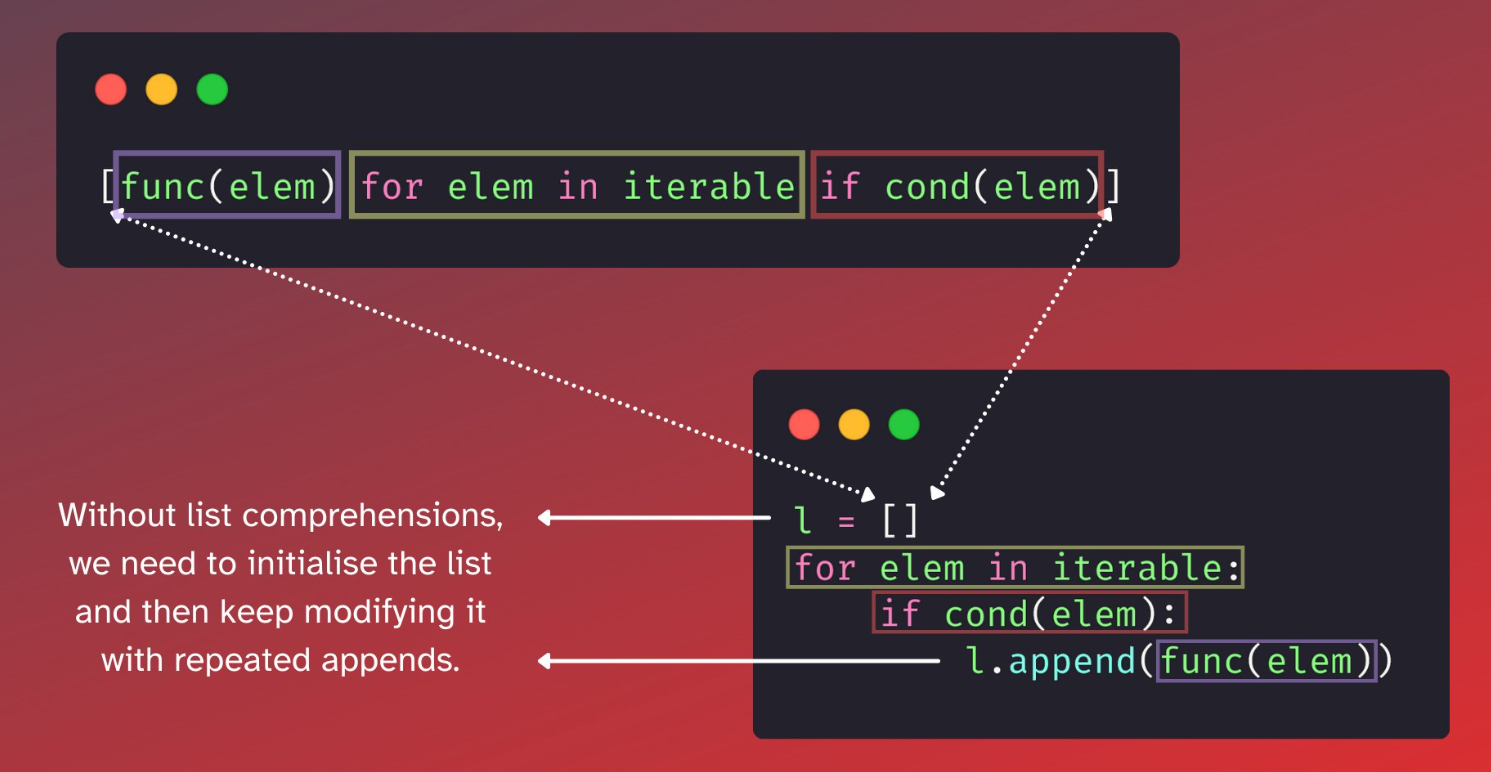

In [ ]:
# list comprehension with a 1D existing list
x = [4, -2, -1, 7, -8]

a = [i**2 for i in x]
print(a)
print()

b = [i**2 for i in x if i > 0]
print(b)
print()

c = [(i,i**2) for i in x]
print(c)
print()

d = [[i,i**2] for i in x]
print(d)
print()

e = [j**2 for j in [i for i in x if i > 0]]
print(e)
print()

# list comprehension with a 2D existing list
X = [[4, -2, -1], [7, -8, -9], [3, 5, 0]]

f = [elem_i_j for row_i in X for elem_i_j in row_i if elem_i_j > 0]
print(f)
print()

[16, 4, 1, 49, 64]

[16, 49]

[(4, 16), (-2, 4), (-1, 1), (7, 49), (-8, 64)]

[[4, 16], [-2, 4], [-1, 1], [7, 49], [-8, 64]]

[16, 49]

[4, 7, 3, 5]



## Again! generator expression vs list comprehension

In [ ]:
from collections.abc import Iterable, Iterator, Generator

a = (i**2 for i in range(4) if i> 1)  # this is a generator
print(isinstance(a, Iterable))
print(isinstance(a, Iterator))
print(isinstance(a, Generator))
print(a)
print()

b = [i**2 for i in range(4) if i> 1]  # this is a list comprehension
print(isinstance(b, Iterable))
print(isinstance(b, Iterator))
print(isinstance(b, Generator))
print(b)
print()

print(next(a))
print(next(a))

True
True
True
<generator object <genexpr> at 0x7a9b08118e40>

True
False
False
[4, 9]

4
9


StopIteration: ignored